https://www.hackerearth.com/challenges/competitive/get-a-room-ml-hackathon/machine-learning/identify-the-habitability-score-of-a-property-12-464aae3e/

In [1]:
# imports

import os
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset_path = Path("./dataset/")
print([x.name for x in dataset_path.iterdir()])

['train.csv', 'train_v2.csv', 'train_v1.csv', 'test_v1.csv', 'test.csv', 'sample_submission.csv']


In [3]:
train_df = pd.read_csv(dataset_path/"train.csv")
test_df = pd.read_csv(dataset_path/"test.csv")
sample_submission_df = pd.read_csv(dataset_path/"sample_submission.csv")

print(train_df.shape, test_df.shape)

(39499, 15) (10500, 14)


In [4]:
sample_submission_df.head()

,Property_ID,Habitability_score
0,0x21e3,71.98
1,0x68d4,71.20
2,0x7d81,71.39
3,0x7a57,31.46
4,0x9409,93.70


In [5]:
def plot_bar(series, orientation=None, name=None):
    keys = []
    values = []
    for key, value in series.value_counts().items():
        keys.append(key)
        values.append(value)
    if orientation == "h":
        fig, ax = plt.subplots(figsize=(8, abs(0.5*len(keys))))
        ax.barh(keys, values)
        ax.set_yticks(keys)
    else:
        fig, ax = plt.subplots(figsize=(abs(0.75*len(keys)), 5))
        ax.bar(keys, values)
        ax.set_xticks(keys)
    if name:
        ax.set_title(name)
    return plt.show()

## Data exploration

| Column |	Description |
| ::- | -:  |
| Property_ID |	Represents a unique identification of a property |
| Property_Type |	Represents the type of the property( Apartment, Bungalow, etc)  |
| Property_Area |	Represents the area of the property in square feets |
| Number_of_Windows |	Represents the number of windows available in the property |
| Number_of_Doors |	Represents the number of doors available in the property |
| Furnishing |	Represents the furnishing type ( Fully Furnished, Semi Furnished, or Unfurnished ) |
| Frequency_of_Powercuts |	Represents the average number of power cuts per week |
| Power_Backup |	Represents the availability of power backup |
| Water_Supply |	Represents the availability of water supply ( All time, Once in a day - Morning, Once in a day  - |Evening, and Once in two days) 
| Traffic_Density_Score |	Represents the density of traffic on a scale of  1 to  10 |
| Crime_Rate |	Represents the crime rate in the neighborhood ( Well below average, Slightly below average,  |Slightly above average, and  Well above average )
| Dust_and_Noise |	Represents the quantity of dust and noise in the neighborhood ( High, Medium, Low ) |
| Air_Quality_Index |	Represents the Air Quality Index of the neighborhood |
| Neighborhood_Review |	Represents the average ratings given to the neighborhood by the people  |
| Habitability_score |	Represents the habitability score of the property |

In [6]:
print(train_df.isnull().sum())
train_df.columns[train_df.isnull().sum() > 0]

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64


Index(['Number_of_Windows', 'Furnishing', 'Frequency_of_Powercuts',
       'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

### Property_Type

In [7]:
train_df.Property_Type.value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64

In [8]:
train_df[train_df.Property_Type=="#R%$G&867"]

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
27,0xb8da,#R%$G&867,990,7.0,3,Semi_Furnished,0.0,No,All time,3.60,Well below average,Low,27.0,4.96,78.07
74,0xc6f2,#R%$G&867,2185,4.0,1,Unfurnished,2.0,No,All time,6.24,Well below average,Medium,100.0,3.53,68.57
78,0x2910,#R%$G&867,985,2.0,3,Fully Furnished,0.0,No,Once in a day - Evening,7.60,Well below average,Medium,117.0,4.13,80.26
81,0x7cc9,#R%$G&867,313,1.0,3,Semi_Furnished,1.0,No,All time,6.02,Well below average,Medium,124.0,4.13,78.34
110,0x290a,#R%$G&867,783,2.0,2,Fully Furnished,0.0,No,Once in a day - Morning,5.05,Slightly below average,Medium,84.0,3.87,72.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38955,0xb272,#R%$G&867,2870,7.0,2,Semi_Furnished,0.0,No,Once in a day - Morning,7.15,Well below average,Medium,105.0,4.46,77.30
38963,0x3cb4,#R%$G&867,956,NaN,3,Semi_Furnished,1.0,Yes,Once in a day - Morning,6.58,Slightly above average,Medium,96.0,2.60,85.35
39006,0xa335,#R%$G&867,3516,12.0,4,NaN,0.0,No,Once in a day - Morning,5.29,Slightly below average,Medium,100.0,3.85,83.53
39210,0xbcb5,#R%$G&867,2186,4.0,3,Unfurnished,0.0,No,All time,6.02,Well below average,Medium,101.0,4.79,71.89


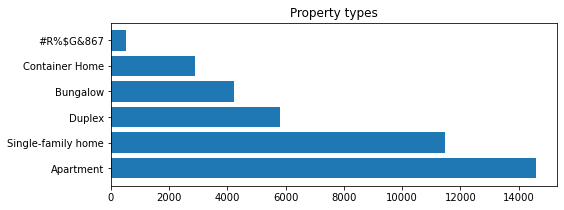

In [9]:
plot_bar(train_df.Property_Type, orientation="h", name="Property types")

### Property_Area

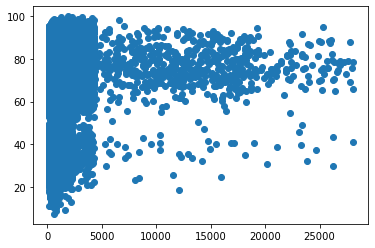

In [56]:
plt.scatter(train_df.Property_Area, train_df.Habitability_score)

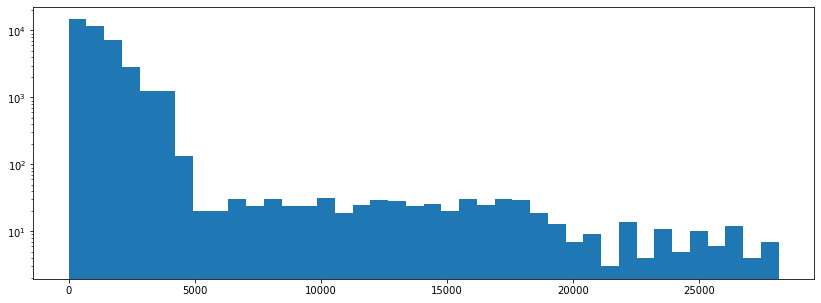

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
min_area, max_area = train_df.Property_Area.min() - 100, train_df.Property_Area.max() + 100
ax.hist(train_df.Property_Area.values, range=(min_area, max_area), bins=40, log=True)
plt.show()

### Number_of_Windows
* Null values

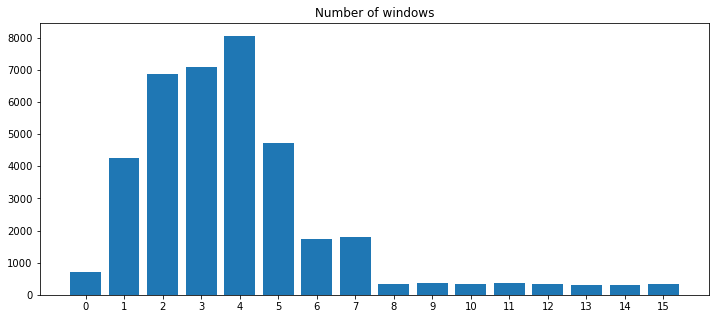

In [11]:
plot_bar(train_df.Number_of_Windows, name="Number of windows")

In [12]:
train_df.Number_of_Windows.value_counts()

4.0     8053
3.0     7080
2.0     6857
5.0     4708
1.0     4254
7.0     1784
6.0     1738
0.0      699
11.0     363
9.0      352
15.0     336
12.0     336
10.0     335
8.0      326
14.0     316
13.0     308
Name: Number_of_Windows, dtype: int64

In [13]:
train_df.Number_of_Windows.isnull().sum()

1654

In [14]:
train_df.Number_of_Windows.fillna(train_df.Number_of_Windows.mode().values[0], inplace=True)
print(train_df.Number_of_Windows.isnull().sum())
train_df.Number_of_Windows.value_counts()

0


4.0     9707
3.0     7080
2.0     6857
5.0     4708
1.0     4254
7.0     1784
6.0     1738
0.0      699
11.0     363
9.0      352
15.0     336
12.0     336
10.0     335
8.0      326
14.0     316
13.0     308
Name: Number_of_Windows, dtype: int64

In [15]:
test_df.Number_of_Windows.fillna(test_df.Number_of_Windows.mode().values[0], inplace=True)

### Number_of_Doors

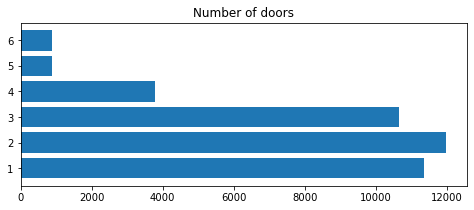

In [16]:
plot_bar(train_df.Number_of_Doors, orientation="h", name="Number of doors")

### Furnishing
* Null values

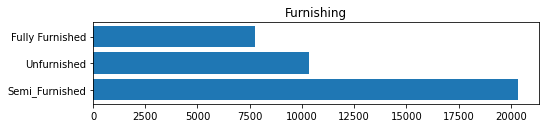

In [17]:
plot_bar(train_df.Furnishing, orientation="h", name="Furnishing")

In [18]:
train_df.Furnishing.isnull().sum()

1042

In [19]:
train_df.Furnishing.fillna(train_df.Furnishing.mode().values[0], inplace=True)
print(train_df.Furnishing.isnull().sum())
train_df.Furnishing.value_counts()

0


Semi_Furnished     21399
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64

In [20]:
test_df.Furnishing.fillna(test_df.Furnishing.mode().values[0], inplace=True)

### Frequency_of_Powercuts

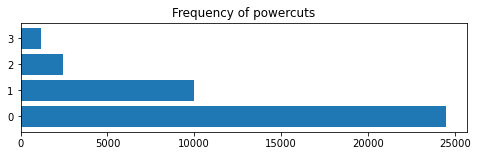

In [21]:
plot_bar(train_df.Frequency_of_Powercuts, orientation="h", name="Frequency of powercuts")

In [22]:
train_df.Frequency_of_Powercuts.isnull().sum()

1383

In [23]:
train_df.Frequency_of_Powercuts.fillna(train_df.Frequency_of_Powercuts.mode().values[0], inplace=True)
print(train_df.Frequency_of_Powercuts.isnull().sum())
train_df.Frequency_of_Powercuts.value_counts()

0


0.0    25854
1.0    10010
2.0     2441
3.0     1194
Name: Frequency_of_Powercuts, dtype: int64

In [24]:
test_df.Frequency_of_Powercuts.fillna(test_df.Frequency_of_Powercuts.mode().values[0], inplace=True)

### Power_Backup
* "NOT MENTIONED" for some data points

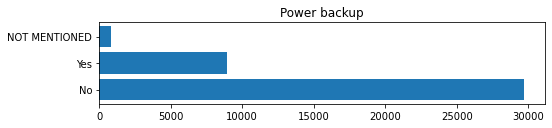

In [25]:
plot_bar(train_df.Power_Backup, orientation="h", name="Power backup")

In [26]:
# is `NOT MENTIONED` null values

In [27]:
train_df[train_df.Power_Backup=="NOT MENTIONED"]

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
24,0xc6d,Bungalow,4161,6.0,3,Semi_Furnished,0.0,NOT MENTIONED,All time,7.83,Well below average,Medium,156.0,4.71,75.63
98,0xb3b7,Single-family home,1822,5.0,4,Unfurnished,1.0,NOT MENTIONED,All time,7.59,Slightly above average,Medium,157.0,2.83,41.62
107,0x3043,Apartment,189,4.0,2,Fully Furnished,0.0,NOT MENTIONED,Once in two days,5.47,Slightly below average,Medium,89.0,3.24,73.29
130,0x92aa,Bungalow,3212,15.0,2,Semi_Furnished,0.0,NOT MENTIONED,Once in a day - Morning,6.30,Well below average,Medium,130.0,4.44,76.03
195,0xf7b,Single-family home,1425,3.0,2,Semi_Furnished,0.0,NOT MENTIONED,All time,7.01,Slightly below average,Medium,154.0,4.09,80.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39088,0x8388,Single-family home,2179,2.0,4,Semi_Furnished,0.0,NOT MENTIONED,Once in a day - Morning,6.76,Well below average,Medium,123.0,4.44,75.01
39249,0x8943,Apartment,290,2.0,3,Fully Furnished,0.0,NOT MENTIONED,All time,4.91,Slightly below average,Medium,80.0,4.19,93.78
39326,0x4330,Single-family home,1333,3.0,3,Fully Furnished,0.0,NOT MENTIONED,Once in a day - Morning,5.94,Slightly below average,Medium,104.0,3.84,93.68
39436,0x1e77,Apartment,319,1.0,1,Semi_Furnished,0.0,NOT MENTIONED,Once in a day - Morning,5.48,Well below average,Low,100.0,4.54,72.04


### Water_Supply
* "NOT MENTIONED" for some data points

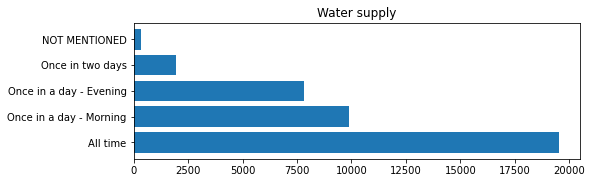

In [28]:
plot_bar(train_df.Water_Supply, orientation="h", name="Water supply")

In [29]:
train_df[train_df.Water_Supply=="NOT MENTIONED"]

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
15,0x5d35,Apartment,795,1.0,1,Fully Furnished,0.0,No,NOT MENTIONED,6.92,Well below average,Medium,169.0,4.07,79.82
37,0x326e,Apartment,404,1.0,1,Semi_Furnished,1.0,No,NOT MENTIONED,6.29,Well below average,Medium,93.0,4.17,83.13
49,0x8151,Container Home,423,4.0,1,Semi_Furnished,1.0,No,NOT MENTIONED,5.10,Well below average,Medium,114.0,3.52,71.70
65,0x636b,Single-family home,1688,5.0,3,Semi_Furnished,0.0,Yes,NOT MENTIONED,6.17,Slightly below average,Medium,97.0,3.22,70.64
133,0xb86,Apartment,579,2.0,1,Semi_Furnished,1.0,No,NOT MENTIONED,7.02,Well below average,Medium,137.0,4.11,81.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39303,0xc155,Apartment,177,1.0,2,Semi_Furnished,0.0,No,NOT MENTIONED,6.63,Well below average,Medium,150.0,4.41,70.62
39336,0x54d0,Apartment,538,3.0,1,Fully Furnished,2.0,No,NOT MENTIONED,6.95,Well below average,Medium,106.0,3.21,72.65
39344,0x2c3f,Container Home,242,0.0,2,Fully Furnished,0.0,Yes,NOT MENTIONED,7.84,Well below average,Medium,141.0,4.73,86.74
39429,0xa822,Apartment,815,4.0,2,Semi_Furnished,0.0,Yes,NOT MENTIONED,6.03,Well below average,Medium,129.0,4.75,86.10


### Traffic_Density_Score
* Normal curve

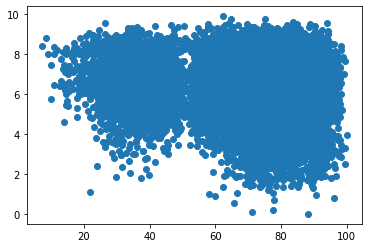

In [54]:
plt.scatter(train_df.Habitability_score, train_df.Traffic_Density_Score)

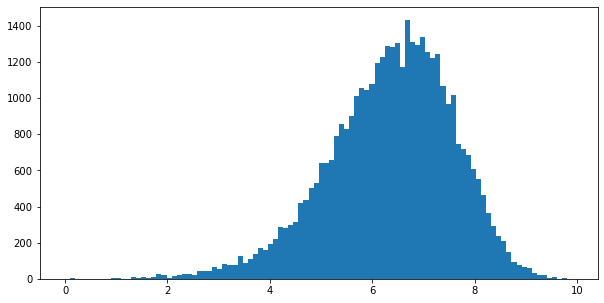

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(train_df.Traffic_Density_Score, bins=100)
plt.show()

### Crime_Rate
* Null values

In [31]:
train_df.Crime_Rate.isnull().sum()

787

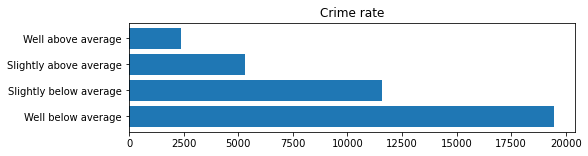

In [32]:
plot_bar(train_df.Crime_Rate, orientation="h", name="Crime rate")

In [33]:
train_df.Crime_Rate.fillna(train_df.Crime_Rate.mode().values[0], inplace=True)
print(train_df.Crime_Rate.isnull().sum())
train_df.Crime_Rate.value_counts()

0


Well below average        20259
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64

In [34]:
test_df.Crime_Rate.fillna(test_df.Crime_Rate.mode().values[0], inplace=True)

### Dust_and_Noise
* Null values

In [35]:
train_df.Dust_and_Noise.isnull().sum()

1219

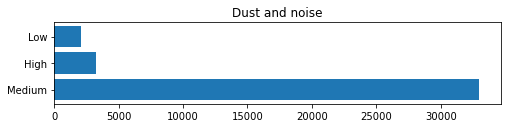

In [36]:
plot_bar(train_df.Dust_and_Noise, orientation="h", name="Dust and noise")

In [37]:
train_df.Dust_and_Noise.fillna(train_df.Dust_and_Noise.mode().values[0], inplace=True)
print(train_df.Dust_and_Noise.isnull().sum())
train_df.Dust_and_Noise.value_counts()

0


Medium    34215
High       3212
Low        2072
Name: Dust_and_Noise, dtype: int64

In [38]:
test_df.Dust_and_Noise.fillna(test_df.Dust_and_Noise.mode().values[0], inplace=True)

### Air_Quality_Index

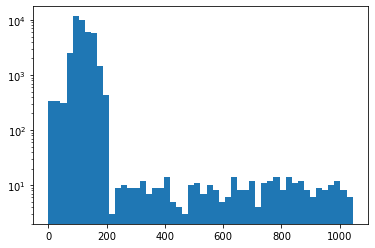

In [39]:
fig, ax = plt.subplots()
ax.hist(train_df.Air_Quality_Index, bins=50, log=True)
plt.show()

### Neighborhood_Review

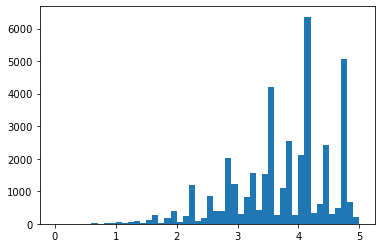

In [40]:
fig, ax = plt.subplots()
ax.hist(train_df.Neighborhood_Review, bins=50)
plt.show()

### Target variable - Habitability_Score

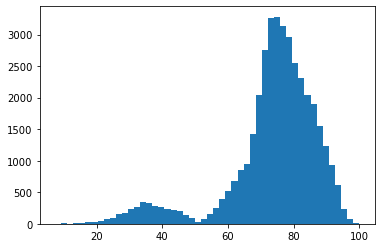

In [41]:
fig, ax = plt.subplots()
ax.hist(train_df.Habitability_score, bins=50)
plt.show()


## Outlier detection

In [43]:
cat_cols = ["Property_Type", "Furnishing", "Power_Backup", "Water_Supply", "Crime_Rate", "Dust_and_Noise"]
num_cols = ["Property_Area", "Number_of_Windows", "Number_of_Doors", "Frequency_of_Powercuts", "Traffic_Density_Score", "Air_Quality_Index", "Neighborhood_Review"]

In [44]:
num_cols

['Property_Area',
 'Number_of_Windows',
 'Number_of_Doors',
 'Frequency_of_Powercuts',
 'Traffic_Density_Score',
 'Air_Quality_Index',
 'Neighborhood_Review']

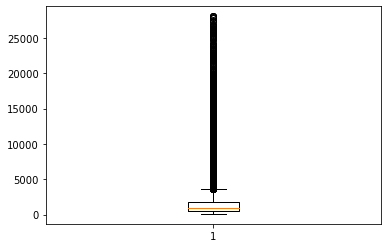

In [45]:
plt.boxplot(train_df.Property_Area)
plt.show()

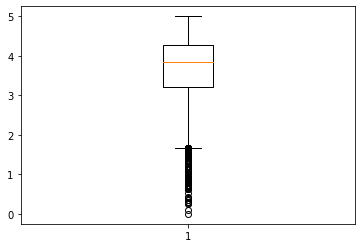

In [51]:
plt.boxplot(train_df.Neighborhood_Review)
plt.show()

## Save the intemediate files

In [44]:
train_df.to_csv(dataset_path/"train_v1.csv", index=False)
test_df.to_csv(dataset_path/"test_v1.csv", index=False)